In [124]:
import pandas as pd
from collections import Counter
from mycolorpy import colorlist as mcp
import matplotlib.pyplot as plt
import numpy as np

## Goodreads10k

In [3]:
location = 'data/goodbooks-10k/'

In [6]:
g10k_ratings = pd.read_csv(location+'ratings.csv')

In [7]:
g10k_ratings.rating.unique()

array([5, 4, 3, 2, 1])

In [10]:
g10k_ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [8]:
g10k_books = pd.read_csv(location+'books.csv')

In [11]:
g10k_books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [16]:
len(g10k_ratings.book_id.unique())

10000

In [17]:
len(g10k_ratings.user_id.unique())

53424

In [18]:
len(g10k_ratings)

5976479

## DBC

In [22]:
location = 'data/hack4dk2017/'

In [28]:
loans = pd.read_csv(location+'udlaan.csv.gz', compression='gzip')

In [31]:
len(loans)

238609626

In [34]:
loans.head()

,laaner_id,biblioteks_id,materiale_id,koen,foedselsaar,dato
0,0,782000,870970-basis:27889107,k,1973-01-01,2015-03-04
1,0,782000,870970-basis:27873251,k,1973-01-01,2015-03-04
2,0,782000,870970-basis:28489595,k,1973-01-01,2015-03-04
3,0,782000,870970-basis:51267699,k,1973-01-01,2015-03-04
4,0,782000,870970-basis:51267699,k,1973-01-01,2015-03-04


In [75]:
unique_users = loans.user.unique()
unique_items = loans.item_processed.unique()
num_users = len(unique_users)
num_items = len(unique_items)

In [60]:
num_users, num_items

(1650073, 607885)

In [36]:
loans.columns = ['user','library','item', 'gender', 'birthyear', 'date']

In [72]:
loans['item_processed'] = loans['item'].str.split(':').str[-1]

In [73]:
loans.head()

,user,library,item,gender,birthyear,date,item_processed
0,0,782000,870970-basis:27889107,k,1973-01-01,2015-03-04,27889107
1,0,782000,870970-basis:27873251,k,1973-01-01,2015-03-04,27873251
2,0,782000,870970-basis:28489595,k,1973-01-01,2015-03-04,28489595
3,0,782000,870970-basis:51267699,k,1973-01-01,2015-03-04,51267699
4,0,782000,870970-basis:51267699,k,1973-01-01,2015-03-04,51267699


In [41]:
books = pd.read_csv(location+'materialer.csv.gz', compression='gzip', low_memory=False)

In [85]:
len(books), len(loans)

(9182830, 238609626)

In [79]:
books.head()

,item,language,creatir,subject,title,type,item_processed
0,125030-katalog:000000001,NaN,Fredensborg Big Band,NaN,Koncert i Copenhagen Jazz House den 1.4.1995. ...,music,000000001
1,125030-katalog:000000002,NaN,Klüvers Big Band,NaN,Koncert i Copenhagen Jazz House den 27.1.1995....,music,000000002
2,125030-katalog:000000003,NaN,Frederik Lundin,NaN,Koncert i Copenhagen Jazz House den 26.1.1995,music,000000003
3,125030-katalog:000000004,NaN,Horace Parlan,NaN,Koncert i Copenhagen Jazz House den 29.4.1995,music,000000004
4,125030-katalog:000000005,NaN,Thomas Metcalf,NaN,Koncert i Copenhagen Jazz House den 16.3.1995 ...,music,000000005


In [83]:
books[books.item.str.contains('870970-basis')]

,item,language,creatir,subject,title,type,item_processed
5483615,870970-basis:00010006,Engelsk,NaN,"[ ""Encyklopædier. Konversationsleksika"", ""03"" ]",Chambers's encyclopædia,book,00010006
5483616,870970-basis:00010014,Tysk,Uwe Johnson,"[ ""Tysk skønlitteratur"", ""84"" ]",Aus dem Leben von Gesine Cresspahl,book,00010014
5483617,870970-basis:00010022,Tysk,Vollmer Hans,"[ ""99.37"", ""Kunst"" ]",Allgemeines Lexikon der bildenden Künstler des...,book,00010022
5483618,870970-basis:00010057,Fransk,Henri Troyat,"[ ""82"", ""Fransk skønlitteratur"" ]",Etrangers sur la terre,book,00010057
5483619,870970-basis:00010081,Engelsk,NaN,"[ ""Encyklopædier. Konversationsleksika"", ""03"" ]",Encyclopaedia Britannica. Micropaedia : ready ...,book,00010081
...,...,...,...,...,...,...,...
7055032,870970-basis:80111711,Dansk,M. Mackeprang,"[ ""Preussen"", ""1910-1919"", ""1800-1899"", ""Sønde...",Nordslesvig under Fremmedherredømmet : taktik ...,book,80111711
7055033,870970-basis:80111975,Dansk,Fr. Jürgensen West,"[ ""1880-1889"", ""valg"", ""1870-1879"", ""1890-1899...",Statistik over Valgene til den tyske Rigsdag i...,book,80111975
7055034,870970-basis:80112262,Dansk,NaN,"[ ""Andresen, Mathias (f. 1858-1916)"", ""Tysklan...",Til Vælgerne i Flensborg-Ꜳbenrꜳ Valgkreds : Un...,book,80112262
7055035,870970-basis:86131617,Dansk,Skoven i Skolen projekt,"[ ""undervisningsmaterialer"", ""træindustri"", ""6...",Skoven i skolen,book,86131617


In [84]:
loans[loans.item.str.contains('870970-basis')]

,user,library,item,gender,birthyear,date,item_processed
0,0,782000,870970-basis:27889107,k,1973-01-01,2015-03-04,27889107
1,0,782000,870970-basis:27873251,k,1973-01-01,2015-03-04,27873251
2,0,782000,870970-basis:28489595,k,1973-01-01,2015-03-04,28489595
3,0,782000,870970-basis:51267699,k,1973-01-01,2015-03-04,51267699
4,0,782000,870970-basis:51267699,k,1973-01-01,2015-03-04,51267699
...,...,...,...,...,...,...,...
238609621,1645927,830060,870970-basis:20494328,k,1966-01-01,2017-07-24,20494328
238609622,1454133,830060,870970-basis:52397057,k,1980-01-01,2017-05-30,52397057
238609623,1454133,830060,870970-basis:50938360,k,1980-01-01,2017-05-30,50938360
238609624,1454133,830060,870970-basis:27770894,k,1980-01-01,2017-05-30,27770894


In [45]:
books.columns = ['item','language','creatir', 'subject', 'title', 'type']

In [70]:
books['item_processed'] = books['item'].str.split(':').str[-1]

In [86]:
books.head()

,item,language,creatir,subject,title,type,item_processed
0,125030-katalog:000000001,NaN,Fredensborg Big Band,NaN,Koncert i Copenhagen Jazz House den 1.4.1995. ...,music,000000001
1,125030-katalog:000000002,NaN,Klüvers Big Band,NaN,Koncert i Copenhagen Jazz House den 27.1.1995....,music,000000002
2,125030-katalog:000000003,NaN,Frederik Lundin,NaN,Koncert i Copenhagen Jazz House den 26.1.1995,music,000000003
3,125030-katalog:000000004,NaN,Horace Parlan,NaN,Koncert i Copenhagen Jazz House den 29.4.1995,music,000000004
4,125030-katalog:000000005,NaN,Thomas Metcalf,NaN,Koncert i Copenhagen Jazz House den 16.3.1995 ...,music,000000005


##### Merge!!

In [106]:
loans_with_info = pd.merge(loans, books, on = 'item', how='inner')

In [107]:
len(loans), len(loans_with_info)

(238609626, 238609626)

In [95]:
unique_loans_items = loans.drop_duplicates('item').item.values

In [97]:
len(unique_loans_items)

607885

In [100]:
books_in_loans = books[books.item.isin(unique_loans_items)].reset_index(drop=True)

Out of the 9million books, 607,885 have participated in loans.

In [101]:
books_in_loans

,item,language,creatir,subject,title,type,item_processed
0,125030-katalog:000132756,NaN,Else Holgersen,"[ ""78.46301"", ""Vokalmusik for børn"", ""78.69"", ...",Fløjte- og malebogen : ꜲElevhæfteV,sheetmusic,000132756
1,125030-katalog:000226569,NaN,Lotte Kærså,"[ ""for børn"", ""sangleg"", ""vokal"", ""børnesange""...",Her bor jeg : 59 sange og sanglege. Nu er der ...,other,000226569
2,125030-katalog:000294106,NaN,Lars Brix Nielsen,"[ ""evergreen"", ""filmsange"", ""vokal"", ""1950-195...",Musikken er af Sven Gyldmark,sheetmusic,000294106
3,150008-academic:ebr10306242,Engelsk,Rainer Crime Concern,"[ ""Juvenile delinquents -- Rehabilitation"", ""E...",Children and young people in custody : managin...,book,ebr10306242
4,150008-academic:ebr10595446,Engelsk,Frederick Murphy,"[ ""Public health administration"", ""Community h...","Community engagement, organization, and develo...",book,ebr10595446
...,...,...,...,...,...,...,...
607880,870970-basis:76281602,NaN,MacAskill Ishbel,"[ ""Skotland"", ""vokal"", ""78.739"", ""Folkemusik. ...",Orain nan Gaidheal,music,76281602
607881,870970-basis:76282110,NaN,Bumblebees,"[ ""jig"", ""Irland"", ""Folkemusik. Irland"", ""78.7...",Buzzin',music,76282110
607882,874310-katalog:DBB0043658,Engelsk,Hanya Yanagihara,"[ ""kærlighed"", ""USA"", ""homoseksualitet"", ""83.8...",A little life,audiobook,DBB0043658
607883,874310-katalog:DBB0605044,Dansk,Ivar Cornelius Petersen (f. 1946),"[ ""Naturvidenskabelig teknik i alm."", ""undervi...",Naturundersøgelser,book,DBB0605044


Fillna...

In [114]:
books = books.fillna('')
books_in_loans = books_in_loans.fillna('')
loans = loans.fillna('')
loans_with_info = loans_with_info.fillna('')

In [120]:
dfs = [books.copy(), books_in_loans.copy(), loans_with_info.copy(), books.copy()]

##### Save!

##### Analyze!

In [118]:
color_map=mcp.gen_color(cmap="Pastel2",n=8)
print(color_map)

['#b3e2cd', '#fdcdac', '#cbd5e8', '#f4cae4', '#e6f5c9', '#fff2ae', '#f1e2cc', '#cccccc']


In [133]:
for df in dfs:
    # replace empty string with "unknown"
    df["language"] = df["language"].apply(lambda x: "unknown" if x=='' else x)
    # flag as "other" if neither male, nor female, nor unknown
    df["language"] = df["language"].apply(lambda x: "other" if (x!="Engelsk")&(x!="Dansk")&(x!="unknown") else x) 

In [134]:
colors = {}
i = 0
for language_value in dfs[0].language.unique(): # books contains all languages.
    colors[language_value] = color_map[i]
    i+=1

In [135]:
Counter(dfs[0].language)

Counter({'unknown': 2390126,
         'other': 1718961,
         'Dansk': 2956003,
         'Engelsk': 2117740})

In [137]:
dfs_names = ['Unique Books', 'Unique Books in Loans', 'Books in Loans', 'Unique Books']

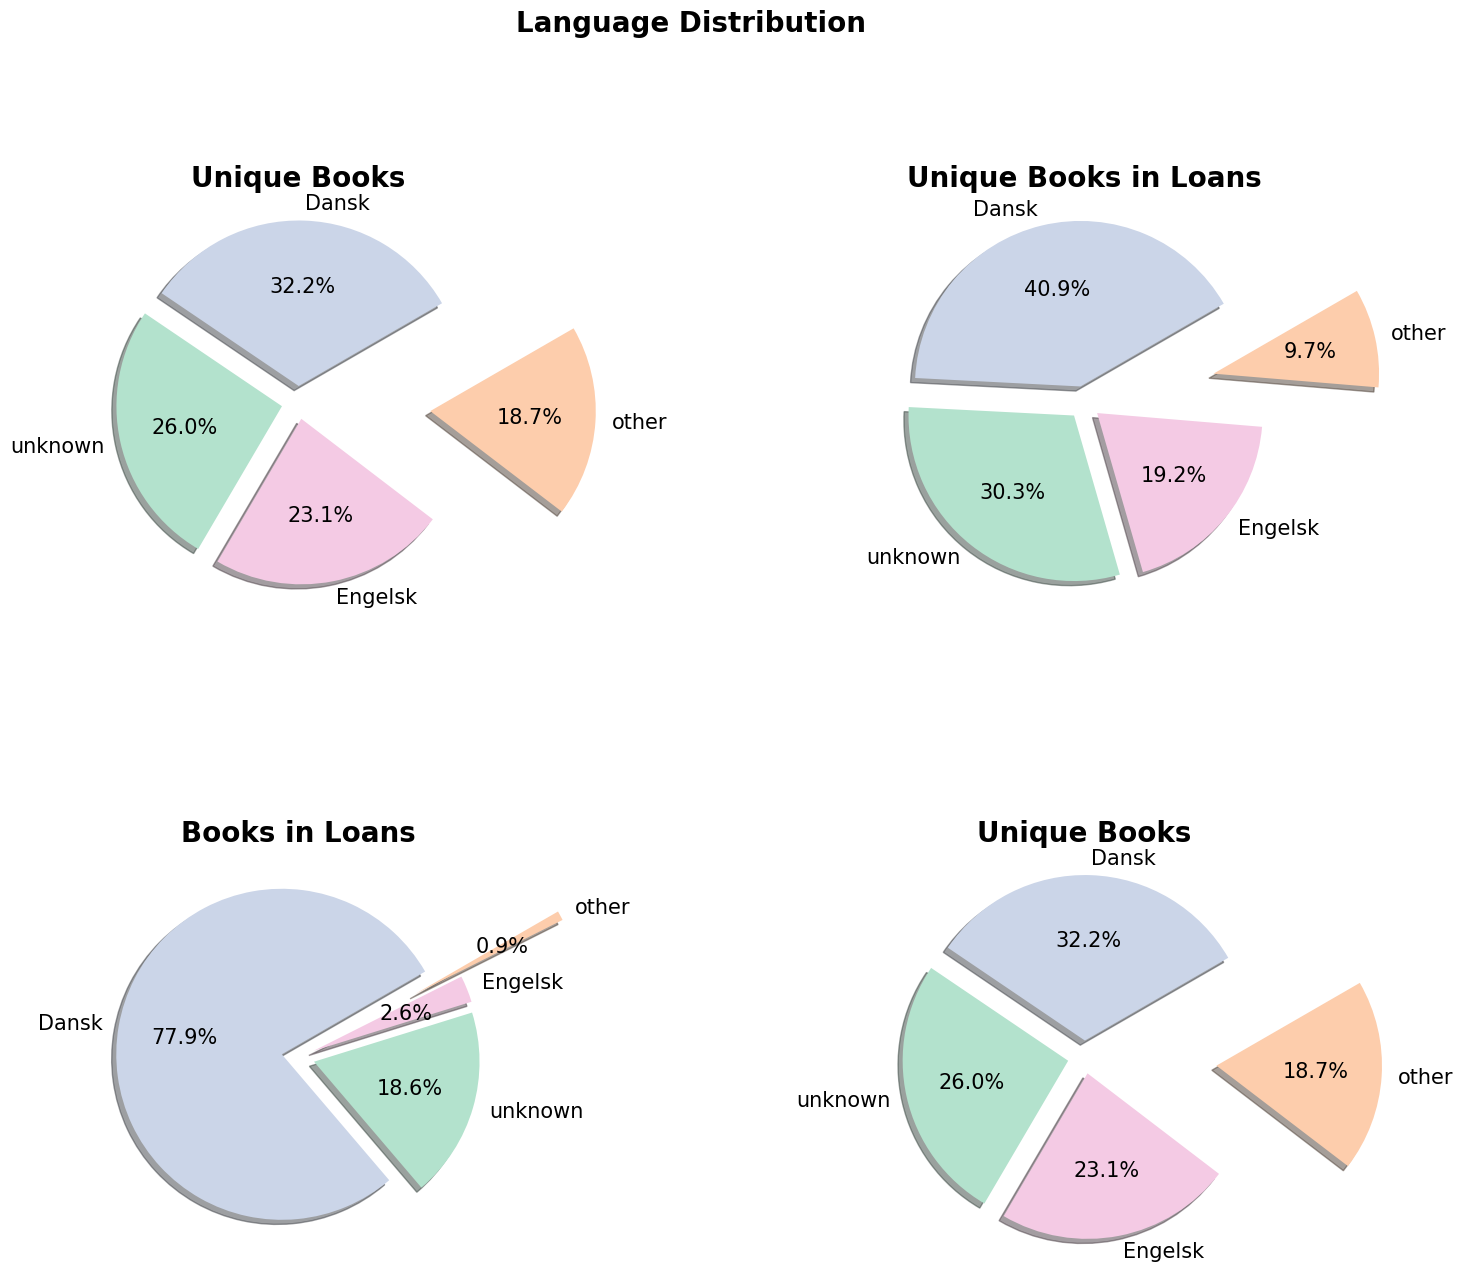

In [138]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
for i in range(len(dfs)):
    j1 = np.divide(i,2)
    j2 = np.mod(i,2)
    dfs[i].language.value_counts().plot(kind="pie",autopct='%1.1f%%',explode=(0.1, 0.1, 0.1,0.8), shadow=True
                                      , startangle=30, ax=axes[int(j1),int(j2)],
                                      textprops={'color':'black', 'fontsize':15},
                                     colors=[colors[v] for v in dfs[i]['language'].value_counts().keys()])
    axes[int(j1),int(j2)].tick_params(labelrotation=0)
    axes[int(j1),int(j2)].set_title(dfs_names[i],fontdict={'fontsize':20, 'weight':'bold'})
    axes[int(j1),int(j2)].set_ylabel('')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.2)

fig.suptitle('Language Distribution',fontsize = 20, weight="bold") 
fig.show()
